In [ ]:
Fraud Detection with Logistic Regression and Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
#Load the dataset

data=pd.read_csv('Online Fraud.csv')
data.head()

,Step,Amount,nameOrig,oldbalabce,newbalance,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,1231006815,170136.0,160296.36,1979787155,0,0.0,0
1,1,1864.28,1666544295,21249.0,19384.72,2044282225,0,0.0,0
2,1,181.00,1305486145,181.0,0.00,553264065,0,0.0,1
3,1,181.00,840083671,181.0,0.00,38997010,21182,0.0,1
4,1,11668.14,2048537720,41554.0,29885.86,1230701703,0,0.0,0


In [5]:
data.shape

(20, 9)

In [6]:
data.info

<bound method DataFrame.info of     Step     Amount    nameOrig  oldbalabce  newbalance    nameDest  \
0      1    9839.64  1231006815   170136.00   160296.36  1979787155   
1      1    1864.28  1666544295    21249.00    19384.72  2044282225   
2      1     181.00  1305486145      181.00        0.00   553264065   
3      1     181.00   840083671      181.00        0.00    38997010   
4      1   11668.14  2048537720    41554.00    29885.86  1230701703   
5      1    7817.71    90045638    53860.00    46042.29   573487274   
6      1    7107.77   154988899   183195.00   176087.23   408069119   
7      1    7861.64  1912850431   176087.23   168225.59   633326333   
8      1    4024.36  1265012928     2671.00        0.00  1176932104   
9      1    5337.77   712410124    41720.00    36382.23   195600860   
10     1    9644.94  1900366749     4465.00        0.00   997608398   
11     1    3099.97   249177573    20771.00    17671.03  2096539129   
12     1    2560.74  1648232591     5070.00  

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Step,20.0,1.000000e+00,0.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Amount,20.0,2.673795e+04,6.699675e+04,181.0,1.789165e+03,4.718275e+03,9.693615e+03,2.291339e+05
nameOrig,20.0,1.218864e+09,6.171345e+08,90045638.0,8.205004e+08,1.251388e+09,1.682478e+09,2.048538e+09
oldbalabce,20.0,6.436451e+04,1.197037e+05,181.0,4.016500e+03,1.804800e+04,4.475500e+04,5.032640e+05
newbalance,20.0,5.950496e+04,1.189848e+05,0.0,0.000000e+00,1.606119e+04,3.879725e+04,4.991652e+05
nameDest,20.0,1.049829e+09,6.502767e+08,38997010.0,5.340486e+08,9.852368e+08,1.659338e+09,2.096539e+09
oldbalanceDest,20.0,5.071650e+03,1.108821e+04,0.0,0.000000e+00,0.000000e+00,1.270750e+03,4.189800e+04
newbalanceDest,20.0,1.249222e+04,3.707666e+04,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.579821e+05
isFraud,20.0,1.000000e-01,3.077935e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [9]:
data.isna().sum()

Step              0
Amount            0
nameOrig          0
oldbalabce        0
newbalance        0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [10]:
df=data.fillna(method='bfill')
df.isna().sum()

Step              0
Amount            0
nameOrig          0
oldbalabce        0
newbalance        0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [11]:
df.head()

,Step,Amount,nameOrig,oldbalabce,newbalance,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,1231006815,170136.0,160296.36,1979787155,0,0.0,0
1,1,1864.28,1666544295,21249.0,19384.72,2044282225,0,0.0,0
2,1,181.00,1305486145,181.0,0.00,553264065,0,0.0,1
3,1,181.00,840083671,181.0,0.00,38997010,21182,0.0,1
4,1,11668.14,2048537720,41554.0,29885.86,1230701703,0,0.0,0


array([[<Axes: title={'center': 'Step'}>,
        <Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'nameOrig'}>],
       [<Axes: title={'center': 'oldbalabce'}>,
        <Axes: title={'center': 'newbalance'}>,
        <Axes: title={'center': 'nameDest'}>],
       [<Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>,
        <Axes: title={'center': 'isFraud'}>]], dtype=object)

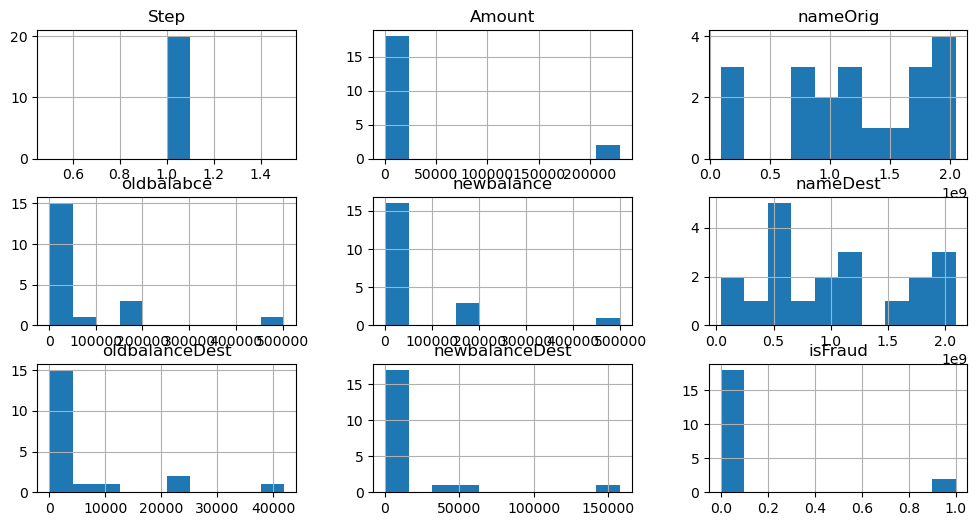

In [39]:
df.hist(figsize=(12,6))

In [40]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:].values

print(x.head(3))


   Step   Amount    nameOrig  oldbalabce  newbalance    nameDest  \
0     1  9839.64  1231006815    170136.0   160296.36  1979787155   
1     1  1864.28  1666544295     21249.0    19384.72  2044282225   
2     1   181.00  1305486145       181.0        0.00   553264065   

   oldbalanceDest  newbalanceDest  
0               0             0.0  
1               0             0.0  
2               0             0.0  


In [41]:
x.head(3)

,Step,Amount,nameOrig,oldbalabce,newbalance,nameDest,oldbalanceDest,newbalanceDest
0,1,9839.64,1231006815,170136.0,160296.36,1979787155,0,0.0
1,1,1864.28,1666544295,21249.0,19384.72,2044282225,0,0.0
2,1,181.00,1305486145,181.0,0.00,553264065,0,0.0


In [42]:
y

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [43]:
xtrain,xtest,ytrain, ytest=train_test_split(x,y, test_size=.25, random_state=22)
print('*************Training Data Shape***************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t' ,ytrain.shape)
print()
print('**************Testing Data Shape****************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data (y-Outcome) Shape:\t',ytest.shape)

*************Training Data Shape***************

Training data-X- Shape:	 (15, 8)

Training data-y- Shape:	 (15, 1)

**************Testing Data Shape****************

Testing data(x-Input) Shape:	 (5, 8)

Testing data (y-Outcome) Shape:	 (5, 1)


In [44]:
#invoke the Log reg algorithm from sklearn

log_reg=LogisticRegression(solver='liblinear', verbose=2)

#Train the model
print('Training the model\n')
log_reg.fit(xtrain, ytrain)

#Test the model

ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples: \n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t', len(ypred))

Training the model

[LibLinear]Predicted Label for the input samples: 
 [0 0 0 1 0]

Testing is completed

Testing samples are: 	 5


C:\Users\Samanta Patil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('**********Performance Measures for Logistic Regression Classification***********\n')
print('Accuracy Score: \t\n',accuracy_score (ytest,ypred))
print()
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report: \n',classification_report (ytest,ypred))
print('='*80)

**********Performance Measures for Logistic Regression Classification***********

Accuracy Score: 	
 1.0

Confusion Matrix:
 [[4 0]
 [0 1]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

